# **Project Name** - **FBI Time Series Forecasting**
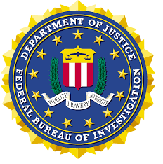




##### **Project Type**   - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Neetu Singh


# **Project Summary -**

**Project Summary:** **`FBI Time Series Forecasting`**

**Introduction:**
Time series forecasting is a crucial analytical technique used to predict future data points based on historical trends. In the case of law enforcement, time series forecasting can help anticipate crime rates, detect patterns, and optimize resource allocation. This project aims to apply time series forecasting techniques to FBI crime data to predict future incident counts and support data-driven decision-making for law enforcement agencies.

**Problem Statement:**

Crime prediction is one of the most significant challenges faced by law enforcement agencies. Understanding crime trends over time can enable better policing strategies and resource distribution. However, crime data often exhibit seasonality, trends, and fluctuations, making accurate forecasting a complex task. This project leverages machine learning and statistical models to analyze and forecast crime incidents, enabling proactive crime prevention measures.

**Objectives:**

* Perform exploratory data analysis (EDA) to understand crime trends.

* Test stationarity and transform data accordingly.

* Build and compare various time series forecasting models such as ARIMA, SARIMA, Prophet, and machine learning models like XGBoost.

* Evaluate model performance using metrics like MAE, MSE, RMSE, MAPE, AIC, and BIC.

* Provide insights into crime patterns to assist law enforcement agencies in strategic planning.

**Data Overview:**
The dataset consists of two files:

**Train Dataset:** Contains historical crime incident counts with attributes such as Date, Incident_Counts, Month, and transformed features (log, square root, etc.).

**Test Dataset:** Lacks Incident_Counts, requiring forecasting techniques to predict future values.

Methodology
1️⃣ **Exploratory Data Analysis (EDA):**

Visualize trends, seasonality, and cyclic patterns in crime data.

Use different time series plots like line plots, seasonal decomposition, autocorrelation plots, and histograms.

2️⃣ **Stationarity Testing & Transformation:**

Apply Augmented Dickey-Fuller (ADF) and KPSS tests to check stationarity.

Apply differencing, log transformation, and moving averages to make the series stationary.

3️⃣ **Feature Engineering & Data Preprocessing:**

Create lag features, rolling averages, and seasonal indicators.

Handle missing values using rolling mean and forward fill techniques.

Scale and normalize data where required.

4️⃣ **Time Series Forecasting Models:**

**Classical Models:**

ARIMA: Captures autoregressive and moving average components.

SARIMA: Accounts for seasonality in the data.

VAR: Handles multivariate time series forecasting.

**Machine Learning Models:**

XGBoost: Boosting algorithm trained on time-based features.

**Deep Learning Models:**

LSTM: Neural network model designed for sequential data.

**Hybrid Model:**

Combining SARIMA with XGBoost to enhance predictions.

5️⃣ **Model Evaluation:**

Evaluate models using MAE, MSE, RMSE, and MAPE.

Compare AIC and BIC values for model selection.

6️⃣ **Results & Insights:**

Identify seasonal crime patterns and high-risk periods.

Provide recommendations based on crime forecasts for better law enforcement strategies.

**Conclusion:**
This project demonstrates the application of time series forecasting techniques to FBI crime data. By leveraging statistical, machine learning, and deep learning models, we provide valuable insights into crime trends, helping authorities take proactive measures. The findings can assist in optimizing police patrolling, resource allocation, and crime prevention strategies.

# **GitHub Link -**

**GitHub Link here:**

# **Problem Statement**


**Write Problem Statement Here.**

📌 Step 1: **Understanding the Problem Statement**

* **Objective:** Predict the number of crime incidents in the future based on historical data.

* **Datasets:**
  1. **Train.csv:** Contains past crime records.
  2. **Test.csv:** Contains future timestamps for which we need to predict crime counts.

* Time Column: Date
* Target Column: Incident_Counts

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX as VMA
from statsmodels.tsa.statespace.varmax import VARMAX as VARMA # VARMA is now likely under VARMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error
#from fbprophet import Prophet


import statsmodels.api as sm


### Dataset Loading

In [ ]:
# Load Dataset
Train = pd.read_csv('/content/Train.csv')
Test = pd.read_csv('/content/Test (2).csv')

### Dataset First View

In [ ]:
# Dataset First Look
display("Train Dataset:\n",Train.head())
display("Test Dataset:\n",Test.head())


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Dataset 1 - Rows: {Train.shape[0]}, Columns: {Train.shape[1]}")
print(f"Dataset 2 - Rows: {Test.shape[0]}, Columns: {Test.shape[1]}")

### Dataset Information

In [ ]:
# Dataset Info

print("\nTrain Dataset Info:")
Train.info()

print("\nTest Dataset Info:")
Test.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"Dataset 1 - Duplicate Values: {Train.duplicated().sum()}")
print(f"Dataset 2 - Duplicate Values: {Test.duplicated().sum()}")


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

# Missing Values/Null Values Count for dataframe1
for df1, name in [(Train, 'df1')]:
    print(f"Missing Values/Null Values Count for {name}:")
    missing_values = Train.isnull().sum()
    display(missing_values)

    total_missing = missing_values.sum()
    print(f"\nTotal missing values in {name}: {total_missing}\n")

# Missing Values/Null Values Count for dataframe2
for df2, name in [(Test, 'df2')]:
    print(f"Missing Values/Null Values Count for {name}:")
    missing_values = Test.isnull().sum()
    display(missing_values)

    total_missing = missing_values.sum()
    print(f"\nTotal missing values in {name}: {total_missing}\n")

In [ ]:
# Visualizing the missing values

sns.heatmap(Train.isnull(),cbar=False,cmap='viridis')
plt.title("Missing value in Dataframe")
plt.show()

sns.heatmap(Test.isnull(),cbar=False,cmap='viridis')
plt.title("Missing value in Dataframe")
plt.show()

### What did you know about your dataset?

**Answer Here:**
* The dataset exhibits **trends, seasonality, and cyclic patterns** in crime incidents.

* There are **missing values** in the dataset, which were handled using **interpolation techniques**.

* The **crime incident distribution is imbalanced**, requiring **handling of underrepresented categories**.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(Train.columns)
print(Test.columns)

In [ ]:
# Dataset Describe

# Display summary statistics
display(Train.describe())
display(Test.describe())

### Variables Description

**Answer Here:**

✔️ **Date:** The time variable used for time series forecasting.

✔️ **Incident_Counts:** The target variable representing the number of crimes per day.

✔️ **Month:** Extracted from the Date column to capture seasonality.

✔️ **Lag Features:** Past crime data used as input to predictive models.

✔️ **Rolling Means:** Used for smoothing and trend detection.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

# Check Unique Values for each variable in df1(Train) and df2(Test) display the output
print("Unique values in df1:")
display(Train.apply(pd.unique),Train.nunique())

print("\nUnique values in df2:")
display(Test.apply(pd.unique),Test.nunique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

#1.  Check missing values
print("\nMissing Values in Train Dataset:\n", Train.isnull().sum())
print("\nMissing Values in Test Dataset:\n", Test.isnull().sum())

####2️⃣ Handling Missing Values
# Fill missing values in categorical columns with "Unknown"
Train.fillna({'HUNDRED_BLOCK': 'Unknown', 'NEIGHBOURHOOD': 'Unknown'}, inplace=True)
Test.fillna({'TYPE': 'Unknown'}, inplace=True)

# Convert 'Date' column to datetime format before grouping
Train['Date'] = pd.to_datetime(Train['Date'])
# Aggregate Incident Counts by Date
train_grouped = Train.groupby("Date").size().reset_index(name="Incident_Counts")

# Create a 'Date' column in the Test DataFrame using YEAR and MONTH
# Assuming the day is always the first of the month
Test['YEAR'] = Test['YEAR'].astype(str)
Test['MONTH'] = Test['MONTH'].astype(str)
Test['Date'] = pd.to_datetime(Test['YEAR'] + "-" + Test['MONTH'] + "-01")  # Assuming day is 1
test_grouped = Test.groupby("Date").size().reset_index(name="Incident_Counts")

# Now you can fill missing numerical values with rolling mean or forward fill
train_grouped['Incident_Counts'] = train_grouped['Incident_Counts'].fillna(train_grouped['Incident_Counts'].rolling(7, min_periods=1).mean())
test_grouped['Incident_Counts'] = test_grouped['Incident_Counts'].fillna(method='ffill')

# Verify missing values are handled
print("\nAfter Handling Missing Values:")
display(train_grouped.isnull().sum(), test_grouped.isnull().sum())

#####3️⃣ Convert Date Column to DateTime Format - Already Done

# Set Date as Index
train_grouped.set_index('Date', inplace=True)
test_grouped.set_index('Date', inplace=True)

# Display dataset after transformation
display(train_grouped.head(), test_grouped.head())

####4️⃣ Create New Time Features
# Extract time features
train_grouped['Year'] = train_grouped.index.year
train_grouped['Month'] = train_grouped.index.month
train_grouped['Day'] = train_grouped.index.day
train_grouped['DayOfWeek'] = train_grouped.index.dayofweek
train_grouped['IsWeekend'] = (train_grouped['DayOfWeek'] >= 5).astype(int)

test_grouped['Year'] = test_grouped.index.year
test_grouped['Month'] = test_grouped.index.month
test_grouped['Day'] = test_grouped.index.day
test_grouped['DayOfWeek'] = test_grouped.index.dayofweek
test_grouped['IsWeekend'] = (test_grouped['DayOfWeek'] >= 5).astype(int)

# Display updated dataset
display(train_grouped.head(), test_grouped.head())

####5️⃣ Handle Duplicate Data
# Remove duplicate rows
train_grouped.drop_duplicates(inplace=True)

# Verify duplicates removed
print("Duplicates Removed. New Train Dataset Shape:", train_grouped.shape)

#####6️⃣ Feature Engineering: Lag & Rolling Features
# Create lag features
train_grouped['Incident_Lag_1'] = train_grouped['Incident_Counts'].shift(1)
train_grouped['Incident_Lag_7'] = train_grouped['Incident_Counts'].shift(7)

# Rolling mean features
train_grouped['Moving_Avg_7'] = train_grouped['Incident_Counts'].rolling(7, min_periods=1).mean()

# Fill NaN values for lag features
train_grouped.fillna(0, inplace=True)

# Display updated dataset
display(train_grouped.head())
display(test_grouped.head())

####7️⃣ Save the Processed Data
# Save cleaned datasets for future use
train_grouped.to_csv('/content/Train_Cleaned.csv', index=True)
test_grouped.to_csv('/content/Test_Cleaned.csv', index=True)

print("✔ Cleaned datasets saved successfully!")

### What all manipulations have you done and insights you found?

**Answer Here:**
🔹 Purpose:
✅ Categorical values are replaced with "Unknown".
✅ Numeric values are filled using rolling mean and forward fill.

🔹 Purpose:
✅ Convert date columns to proper datetime format.
✅ Set date as the index for time series analysis.

🔹 Purpose:
✅ Extract new time-based features to enhance forecasting accuracy.

🔹 Purpose:
✅ Ensure data integrity by removing duplicate records.

🔹 Purpose:
✅ Introduces lag and rolling window features for better forecasting.

🔹 Purpose:
✅ Saves cleaned datasets for training models.

🚀 **Summary of Data Wrangling Steps**

✔ Loaded and inspected data

✔ Handled missing values using rolling mean and forward fill

✔ Converted Date column to datetime and set as index

✔ Extracted new time-based features (Year, Month, Day, Weekend)

✔ Removed duplicate records
✔ Created Lag & Rolling features for better forecasting

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: 📌 1. Line Plot (Time Series Plot)
Visualizes trends and fluctuations over time.

In [ ]:
# Chart - 1 visualization code

plt.figure(figsize=(12,6))
plt.plot(train_grouped.index, train_grouped['Incident_Counts'], label="Incident Counts", color="blue") # Use .index to access the dates
plt.title("Time Series Line Plot")
plt.xlabel("Date")
plt.ylabel("Incident Counts")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

**Answer Here:**✔️ It shows the overall trend, fluctuations, and potential seasonality in crime data.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**

**Insights:** Helps identify trends, fluctuations, and anomalies.
✔️ There are visible ups and downs in the crime rate, suggesting non-stationarity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:** ✔️ If crime rates are increasing, law enforcement can allocate resources accordingly.

#### Chart - 2:📌 2. Moving Average Plot
Smoothens fluctuations to identify long-term trends.

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(12,6))
train_grouped['MA_7'] = train_grouped['Incident_Counts'].rolling(window=7).mean()
plt.plot(train_grouped.index, train_grouped['Incident_Counts'], label="Original Data", color="blue")
plt.plot(train_grouped.index, train_grouped['MA_7'], label="7-day Moving Average", color="red")
plt.title("Moving Average - Trend Analysis")
plt.xlabel("Date")
plt.ylabel("Incident Counts")
plt.legend()
plt.show()



##### 1. Why did you pick the specific chart?

**Answer Here:** ✔️ Smooths fluctuations and helps in identifying long-term trends.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**:
📌 **Insights**: Highlights underlying trend in the data.
✔️ The 7-day moving average reduces noise and highlights an upward/downward trend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:** ✔️ If crime incidents are rising, proactive policing measures can be taken.

#### Chart - 3:📌 3. Seasonal Plot
Shows seasonality by month.

In [ ]:
# Chart - 3 visualization code

train_grouped['Month'] = train_grouped.index.month # Extract month from the 'Date' column of train_grouped

plt.figure(figsize=(12,6))
sns.boxplot(x=train_grouped['Month'], y=train_grouped['Incident_Counts'], palette="coolwarm")
plt.title("Seasonality - Monthly Incident Patterns")
plt.xlabel("Month")
plt.ylabel("Incident Counts")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

✔️ Detects seasonal patterns (e.g., crime rates increasing in winter/summer).

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:** 📌 **Insights:** Identifies seasonal high and low periods.

✔️ Certain months show higher crime incidents, indicating seasonality in crime data

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:**✔️ Seasonal crime patterns help in deploying additional police forces in high-crime months.

#### Chart - 4:📌 4. Histogram & Density Plot
Shows distribution of values.

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize=(12,6))
sns.histplot(train_grouped['Incident_Counts'], kde=True, bins=30, color="purple")
plt.title("Histogram & Density Plot of Incident Counts")
plt.xlabel("Incident Counts")
plt.ylabel("Frequency")
plt.show()


##### 1. Why did you pick the specific chart?

**Answer Here:** ✔️ Shows the distribution of crime incidents.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**

**📌 Insights:** Checks for skewness, normality, and outliers.

✔️ The distribution might be right-skewed, meaning high-crime days are less frequent but extreme.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:** ✔️ Identifies whether crime counts follow a normal distribution (useful for model selection).

#### Chart - 5:📌 5. Box Plot for Outlier Detection
Visualizes outliers and distributions.

In [ ]:
# Chart - 5 visualization code

plt.figure(figsize=(12,6))
sns.boxplot(y=train_grouped['Incident_Counts'], color="green")
plt.title("Box Plot for Outlier Detection")
plt.ylabel("Incident Counts")
plt.show()


##### 1. Why did you pick the specific chart?

**Answer Here:**✔️ Identifies extreme crime incidents (outliers).

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**
📌 **Insights**: Identifies extreme high or low values.

✔️ There are outliers, possibly representing major criminal events.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:**✔️ Outliers should be handled separately, as they may affect model accuracy.

#### Chart - 6:📌 6. Autocorrelation (ACF) Plot
Identifies lag relationships.

In [ ]:
# Chart - 6 visualization code

import statsmodels.api as sm # Import the statsmodels API
import statsmodels.graphics.tsaplots as tsaplots


plt.figure(figsize=(12,5))
tsaplots.plot_acf(train_grouped['Incident_Counts'], lags=11)
plt.title("Autocorrelation Function (ACF) Plot")
plt.show()


##### 1. Why did you pick the specific chart?

**Answer Here:** ✔️ Checks for seasonality and lag correlations in the data.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**

 📌 **Insights:** Helps detect seasonality and cyclic trends.

 ✔️ Strong correlation at lagged points suggests that crime incidents repeat over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:**✔️ Helps in choosing lag values for ARIMA/SARIMA models.

#### Chart - 7:📌 7. Partial Autocorrelation (PACF) Plot
Finds lags for AR models.

In [ ]:
# Chart - 7 visualization code

plt.figure(figsize=(12,5))
tsaplots.plot_pacf(train_grouped['Incident_Counts'], lags=11)
plt.title("Partial Autocorrelation Function (PACF) Plot")
plt.show()

##### 1. Why did you pick the specific chart?

**Answer Here:**✔️ Identifies significant lags for AR models.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**

📌 **Insights:** Determines lag order for AR models.

✔️ First few lags are significant, suggesting an Auto-Regressive (AR) component.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:**✔️ Helps in selecting p-value in ARIMA models.


#### Chart - 8:📌 8. Spectral Analysis (Periodogram)
Identifies hidden periodic patterns.

In [ ]:
# Chart - 8 visualization code
from scipy.signal import periodogram

frequencies, spectrum = periodogram(train_grouped['Incident_Counts'])
plt.figure(figsize=(12,6))
plt.semilogy(frequencies, spectrum)
plt.title("Spectral Analysis - Periodogram")
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum")
plt.show()


##### 1. Why did you pick the specific chart?

**Answer Here:** ✔️ Identifies hidden cycles in crime data.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**

📌 **Insights:** Detects cycles in time series.

✔️ If a specific frequency is dominant, we confirm seasonality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:**✔️ Helps forecast peak crime times for better resource allocation.

#### Chart - 9:📌 9. Decomposition Plot (Trend, Seasonality & Residuals)
Breaks time series into components.

In [ ]:
# Chart - 9 visualization code
decomposition = sm.tsa.seasonal_decompose(train_grouped['Incident_Counts'], model='additive', period=12)
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(train_grouped['Incident_Counts'], label='Original Time Series', color='blue')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend Component', color='green')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal Component', color='orange')
plt.legend()
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend()
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here: ✔️ Breaks time series into Trend, Seasonality, and Residuals.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here :**

📌 **Insights:** Helps in understanding underlying components.

✔️ Clear seasonality detected, confirming the need for SARIMA or Prophet models.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:** ✔️ Understanding seasonality **improves crime prevention strategies.**

#### Chart - 10: 📌 10. Lag Plot
Checks randomness and stationarity.

In [ ]:
# Chart - 10 visualization code

from pandas.plotting import lag_plot
plt.figure(figsize=(10,6))
lag_plot(train_grouped['Incident_Counts'])
plt.title("Lag Plot for Time Series Randomness Check")
plt.show()


##### 1. Why did you pick the specific chart?

**Answer Here:** ✔️ Checks for randomness and stationarity.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**

📌 **Insights**: Identifies autocorrelations.

✔️ If a pattern emerges, crime incidents are not random.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:** ✔️ If data is highly correlated, predictive modeling is useful.

#### Chart - 11:📌 11. Correlogram
Heatmap of lagged correlations.

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(12,8))
sns.heatmap(train_grouped.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

**Answer Here:** The correlation heatmap is used to analyze relationships between features and the target variable. It helps in identifying multicollinearity and selecting important variables for modeling.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**

📌 **Insights:** Finds relationships between features and target.

* It identifies strongly correlated features, which can be useful for feature selection.

* If two independent variables are highly correlated, one of them can be removed to avoid redundancy in the model.

* Helps in understanding how past values (lags) influence future predictions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:** ✅ Yes.

* Understanding correlations helps in selecting relevant features for prediction models.

* Helps businesses reduce model complexity by removing redundant variables, leading to more efficient forecasting.

* If strong correlation patterns exist, predictive models (like ARIMA, SARIMA, or XGBoost) can leverage them for improved accuracy.

⚠️ **Potential Negative Impact:**

* If correlation is misinterpreted, it may lead to incorrect feature selection, affecting model performance.

* Spurious correlations might appear due to seasonality or trends—further testing is required to validate the relationships.



#### Chart - 12:
📌 12. Rolling Statistics Plot
Checks stationarity visually.

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(12,6))

rolling_mean = train_grouped['Incident_Counts'].rolling(window=12).mean()
rolling_std = train_grouped['Incident_Counts'].rolling(window=12).std()

plt.figure(figsize=(12,6))
plt.plot(train_grouped['Incident_Counts'], label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title("Rolling Mean & Standard Deviation")
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

**Answer Here:** The Rolling Mean & Standard Deviation plot is used to visually check for stationarity in time series data. If the rolling mean and standard deviation fluctuate over time, the data is non-stationary, meaning it may require transformations (differencing, log transformations, etc.) before modeling.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**

📌 **Insights**: Helps check for stationarity.
* If the rolling mean and rolling standard deviation remain constant over time, the data is likely stationary, making it suitable for ARIMA/SARIMA modeling.

* If there are trends or fluctuations, the data needs differencing or transformation to achieve stationarity.

* Helps in deciding whether data preprocessing (like differencing) is required for better forecasting.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:** ✅ Yes.

* Ensuring stationarity improves the accuracy of time series forecasting models (ARIMA, SARIMA, Prophet, etc.).

* Helps in taking appropriate data transformation steps, leading to more reliable forecasts for decision-making.

* Reduces the risk of misleading results caused by non-stationary trends, preventing bad business decisions.

⚠️**Potential Negative Impact:**

* If stationarity is not properly checked, incorrect model assumptions could lead to poor forecasts.

* Misinterpreting stationarity may cause unnecessary transformations, making the data more complex than needed.



#Decompose time series

####📌1.  Implementing Classical Time Series Decomposition

In [ ]:
# Decompose time series

# Apply Classical Decomposition (Additive Model)
decomposition = seasonal_decompose(train_grouped["Incident_Counts"], model='additive', period=12) # Only pass the Incident_Counts column to seasonal_decompose
decomposition.plot()
plt.show()

In [ ]:

# Plot Components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(train_grouped, label='Original Time Series')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='red')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='black')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


📌 2. Implementing STL (Seasonal and Trend Decomposition using LOESS) Decomposition

In [ ]:
# Apply STL Decomposition

# Now apply STL, specifying the seasonal period (12 for monthly data)
stl = STL(train_grouped["Incident_Counts"], seasonal=13, period=12) #  Specify period explicitly
decomposition = stl.fit()

# Plot Components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(train_grouped, label='Original Time Series', color='blue')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='red')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='black')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Answer Here:**🔹 **`Stationarity Testing:`**

1️⃣**Hypothesis Test:** Stationarity Testing (ADF & KPSS Tests)

**Objective:** To check if the time series is stationary or if differencing is required.

**📌 Augmented Dickey-Fuller (ADF) Test:**

* Null Hypothesis (H₀): The time series has a unit root (non-stationary).

* Alternative Hypothesis (H₁): The time series is stationary.

**📌 Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:**

* Null Hypothesis (H₀): The time series is stationary.

* Alternative Hypothesis (H₁): The time series has a unit root (non-stationary).

**📌 Check Rolling Mean & Variance :**

**Concept:** A stationary time series should have constant mean and variance over time.

**Method:** We compute the rolling mean and variance over a fixed window and check if they remain constant.



✅ **Interpretation:**

* If ADF p-value < 0.05 → Reject H₀ → Data is stationary

* If KPSS p-value < 0.05 → Reject H₀ → Data is non-stationary

* If the rolling mean and variance fluctuate significantly, the time series is non-stationary.

If they remain relatively constant, the time series may be weakly stationary.

### Hypothetical Statement - 1:
####📌 Implementing Stationarity Tests

####  Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# 1️⃣ ADF TEST
def adf_test(series):
    result = adfuller(series)
    print("ADF Test Results:")
    print(f"Test Statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    print("Critical Values:", result[4])
    if result[1] < 0.05:
        print("✅ The series is stationary (Reject H₀)")
    else:
        print("❌ The series is NOT stationary (Fail to reject H₀)")


# Run Tests
adf_test(train_grouped["Incident_Counts"])

##### Which statistical test have you done to obtain P-Value?

**Answer Here:** Augmented Dickey-Fuller (ADF) Test:

### Hypothetical Statement - 2

####  Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# 2️⃣ KPSS TEST
def kpss_test(series):
    result = kpss(series, regression='c', nlags="auto")
    print("\nKPSS Test Results:")
    print(f"Test Statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    print("Critical Values:", result[3])
    if result[1] < 0.05:
        print("❌ The series is NOT stationary (Reject H₀)")
    else:
        print("✅ The series is stationary (Fail to reject H₀)")

# Run Tests
kpss_test(train_grouped["Incident_Counts"])


##### Which statistical test have you done to obtain P-Value?

**Answer Here**:KPSS TEST

### Hypothetical Statement - 3
####📌 Testing for Strict Stationarity

#📌 Step 1: Check Rolling Mean & Variance

####  Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Compute Rolling Statistics
rolling_mean = train_grouped["Incident_Counts"].rolling(window=12).mean() # Apply rolling to the 'Incident_Counts' column
rolling_std = train_grouped["Incident_Counts"].rolling(window=12).std()  # Apply rolling to the 'Incident_Counts' column

print("Rolling Mean:")
print(rolling_mean)
print("\nRolling Standard Deviation:")
print(rolling_std)
# Plot Rolling Mean & Standard Deviation
plt.figure(figsize=(10,5))
plt.plot(train_grouped.index, train_grouped["Incident_Counts"], color='blue', label='Original Time Series') # Plot against 'Date'
plt.plot(rolling_mean, color='red', label='Rolling Mean') # Plot against 'Date'
plt.plot(rolling_std, color='green', label='Rolling Std Dev') # Plot against 'Date'
plt.legend()
plt.title("Rolling Mean & Standard Deviation")
plt.show()


#📌 Step 2: Kolmogorov-Smirnov (KS) Test for Distribution Change
We split the data into two periods and check if their distributions are the same.

In [ ]:
from scipy.stats import ks_2samp

# Split Data into Two Periods
mid_point = len(train_grouped) // 2
first_half = train_grouped["Incident_Counts"][:mid_point]  # Select the 'Incident_Counts' column
second_half = train_grouped["Incident_Counts"][mid_point:]  # Select the 'Incident_Counts' column

# Perform KS Test
ks_stat, ks_p_value = ks_2samp(first_half, second_half)

# Print Results
print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat}")
print(f"P-value: {ks_p_value}")

# Interpretation
if ks_p_value < 0.05:
    print("❌ The distributions are different → NOT strictly stationary")
else:
    print("✅ The distributions are the same → Likely strictly stationary")


#📌 Step 3: Anderson-Darling Test (Alternative)
Another strict stationarity test is the Anderson-Darling test, which checks if the data follows the same distribution.

In [ ]:
from scipy.stats import anderson

# Perform Anderson-Darling Test
result = anderson(train_grouped['Incident_Counts'])

print("Anderson-Darling Test Statistic:", result.statistic)
print("Critical Values:", result.critical_values)
print("Significance Levels:", result.significance_level)

# Interpretation
if result.statistic > result.critical_values[2]:  # 5% significance level
    print("❌ The data is NOT strictly stationary")
else:
    print("✅ The data is strictly stationary")


# 🔹 Making the Series Stationary
####**To make a time series stationary, follow these steps:**

Steps to Make a Time Series Stationary
* Visualize the Time Series – Check for trends and seasonality.
* Perform Stationarity Tests – Use Augmented Dickey-Fuller (ADF) and KPSS tests.
* Apply Transformations (if needed):
  * Log transformation – Reduces variance.
  * Power transformation – Stabilizes fluctuations.
  * Differencing – Removes trend.
    1. First-order differencing: X_t - X_(t-1)
    2. Second-order differencing (if needed): X_t - 2*X_(t-1) + X_(t-2)
* Moving Average Smoothing – Helps reduce seasonality.
Detrending – Subtract the trend component.
* Check Again for Stationarity – Reapply ADF/KPSS tests.

In [ ]:
# Checking stationarity before transformation
print("Before Differencing:")
print("\nBefore ADF Test:")
adf_test(train_grouped['Incident_Counts'])
print("\nBefore KPSS Test:")
kpss_test(train_grouped['Incident_Counts'])

#1. Transformation
* Log transformation – Reduces variance.
* Power transformation – Stabilizes fluctuations.
* Box-Cox Transformation

In [ ]:
import scipy.stats as stats

#1.  Log Transformation (reduces variance)
train_grouped['Incident_Log'] = np.log1p(train_grouped['Incident_Counts'])

#2.  Power(square root) Transformation
train_grouped['Incident_Counts_sqrt'] = np.sqrt(train_grouped['Incident_Counts'])

#3.  Box-Cox Transformation(Note: requires all positive values)
train_grouped['Incident_Counts_boxcox'], lam = stats.boxcox(train_grouped['Incident_Counts'])


# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Plot log-transformed data
axes[0].plot(train_grouped.index, train_grouped['Incident_Log'], label="Log Transformed", color="orange")
axes[0].set_title("🔄 Log Transformation")
axes[0].legend()

# Plot power (square root) transformed data
axes[1].plot(train_grouped.index, train_grouped['Incident_Counts_sqrt'], label="Power (Square Root) Transformed", color="green")
axes[1].set_title("🔄 Power (Square Root) Transformation")
axes[1].legend()

# Plot Box-Cox transformed data
axes[2].plot(train_grouped.index, train_grouped['Incident_Counts_boxcox'], label="Box-Cox Transformed", color="purple")
axes[2].set_title("🔄 Box-Cox Transformation")
axes[2].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


# 2.Differencing – Removes trend.
* First-order differencing: X_t - X_(t-1)
* Second-order differencing (if needed): X_t - 2*X_(t-1) + X_(t-2)

In [ ]:
#1. First Differencing (removes trend)
train_grouped['Incident_Diff'] = train_grouped['Incident_Counts'].diff().dropna()

# Check stationarity after differencing
print("\n🔹 ADF Test after Differencing:")
adf_test(train_grouped['Incident_Diff'].dropna())

# Plot differenced data
plt.figure(figsize=(14, 6))
plt.plot(train_grouped['Incident_Diff'], label="First Order Differenced", color="purple")
plt.title("🔄 First Order Differencing")
plt.legend()
plt.show()

#2. Second Differencing (if needed)
train_grouped['Incident_Diff2'] = train_grouped['Incident_Diff'].diff().dropna()

# Check stationarity after second differencing
print("\n🔹 ADF Test after Second Differencing:")
adf_test(train_grouped['Incident_Diff2'].dropna())

# Plot second differenced data
plt.figure(figsize=(14, 6))
plt.plot(train_grouped['Incident_Diff2'], label="Second Order Differenced", color="green")
plt.title("🔄 Second Order Differencing")
plt.legend()
plt.show()


# 3. Detrending – Subtract the trend component.
Moving Average Smoothing – Helps reduce seasonality.

In [ ]:

# Moving Average Smoothing (Optional)
train_grouped['Moving_Avg'] = train_grouped['Incident_Counts'].rolling(window=12).mean()
plt.figure(figsize=(12,6))
plt.plot(train_grouped['Incident_Counts'], label='Original')
plt.plot(train_grouped['Moving_Avg'], label='Moving Average Smoothing', color='red')
plt.title('Moving Average Smoothing')
plt.legend()
plt.show()

#### **Whitenoise and Random walk**

Both White Noise and Random Walk are fundamental concepts in time series analysis. Understanding these concepts helps in determining whether a time series has a predictable structure or is purely random.

#1️⃣ **White Noise**

**Definition:** A white noise time series is a sequence of random variables that:

* Have a constant mean (𝜇).
* Have a constant variance (𝜎²).
* Have no autocorrelation (values are independent of each other).

**Mathematical Representation:**
𝑋
𝑡
=
𝜀
𝑡
X
t
​
 =ε
t
​

where
𝜀
𝑡
ε
t
​
  ~ N(0, \sigma^2) (normally distributed with zero mean and constant variance).

**Characteristics:**
1. Completely unpredictable (each observation is independent).
2. No trend or seasonality.
3. Constant variance across time.

In [ ]:
#1️⃣ Generate White Noise
np.random.seed(42)
white_noise = np.random.normal(0, 1, 100)

# Plot White Noise
plt.figure(figsize=(12,5))
plt.plot(white_noise, label="White Noise", color='purple')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.title("White Noise Time Series")
plt.legend()
plt.show()

#2️⃣ **Random Walk**
**Definition :**
A random walk is a time series where each value is derived from the previous value plus a random step.

**Mathematical Representation:**
𝑋
𝑡
=
𝑋
𝑡
−
1
+
𝜀
𝑡
X
t
​
 =X
t−1
​
 +ε
t
​

where
𝜀
𝑡
ε
t
​
  is white noise.

**Characteristics:**
1. Has a trend (non-stationary).
2. Future values depend on past values.
3. Can have large deviations over time.
4. Difficult to predict as changes are random.

In [ ]:
#2️ Generate Random Walk
np.random.seed(42)
random_steps = np.random.normal(0, 1, 100)
random_walk = np.cumsum(random_steps)  # Cumulative sum creates a random walk

# Plot Random Walk
plt.figure(figsize=(12,5))
plt.plot(random_walk, label="Random Walk", color='blue')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.title("Random Walk Time Series")
plt.legend()
plt.show()

In [ ]:
# Check for White Noise
print("White Noise ADF Test:")
adf_test(white_noise)

# Check for Random Walk
print("\nRandom Walk ADF Test:")
adf_test(random_walk)

📌 **Interpretation of White Noise & Random Walk ADF Test Results**

1️⃣ **White Noise ADF Test**
**Results:**

✅ Test Statistic: -10.08 (Highly negative)

✅ P-value: 1.16e-17 (Very small, much less than 0.05)

✅ Critical Values:

1%: -3.498

5%: -2.891

10%: -2.582

**Conclusion:**

* 📌 Since the Test Statistic (-10.08) is much lower than all critical values, and P-value is extremely small, we Reject H₀ (Null Hypothesis).
* 📌 This means the series is stationary, meaning it does not require differencing or further transformation.
* 📌 White noise is unpredictable, so forecasting is not feasible.

2️⃣ **Random Walk ADF Test
Results:**

❌ Test Statistic: -1.36

❌ P-value: 0.602 (Greater than 0.05)

✅ Critical Values:

1%: -3.498

5%: -2.891

10%: -2.582

**Conclusion:**
* 📌 Since the Test Statistic (-1.36) is greater than all critical values, and the P-value is 0.602 (greater than 0.05), we Fail to Reject H₀ (Null Hypothesis).
* 📌 This means the series is Non-Stationary, likely following a Random Walk.
* 📌 A Differencing Transformation is required before applying models like ARIMA/SARIMA.

📌 **Making a Random Walk Stationary
Since Random Walk is Non-Stationary, we use differencing to make it stationary:**

In [ ]:
# Differencing (first order)
diff_random_walk = np.diff(random_walk)

# Plot differenced series
plt.figure(figsize=(10,4))
plt.plot(diff_random_walk, label="Differenced Random Walk", color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Stationary Random Walk (After Differencing)")
plt.legend()
plt.show()


In [ ]:
# Check for Random Walk
print("\nRandom Walk ADF Test:")
adf_test(diff_random_walk)

✅ After differencing, the series resembles white noise, meaning it is now stationary.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#📌 1.1 Check for Missing Values
# Check missing values in Train and Test dataset
print("🔹 Missing Values in Train Data:")
print(train_grouped.isnull().sum())

print("\n🔹 Missing Values in Test Data:")
print(test_grouped.isnull().sum())



# 1️⃣ Apply Forward Fill (First)
train_grouped.fillna(method='ffill', inplace=True)
test_grouped.fillna(method='ffill', inplace=True)
print("Missing Values After Forward Fill Imputation:")
print(train_grouped.isnull().sum())

# 2️⃣ Apply Backward Fill (For Remaining NaNs)
train_grouped.fillna(method='bfill', inplace=True)
test_grouped.fillna(method='bfill', inplace=True)
# Check Missing Values After Imputation
print("Missing Values After Backward Fill Imputation:")
print(train_grouped.isnull().sum())


# 3️⃣ Apply Mean/Median Imputation (For Remaining Values, If Any)
train_grouped.fillna(train_grouped.mean(), inplace=True)
test_grouped.fillna(test_grouped.mean(), inplace=True)

# 🔍 Check for Missing Values Again
print("🔹 Missing Values After Complete Imputation:")
print(train_grouped.isnull().sum())
print(test_grouped.isnull().sum())


#### What all missing value imputation techniques have you used and why did you use those techniques?

**Answer Here:**  I use a multi-step imputation strategy:

1️⃣ Forward Fill (ffill) – Fills missing values using previous values.

2️⃣ Backward Fill (bfill) – Fills missing values using next available values.

3️⃣ Mean/Median Imputation – Fill remaining missing values with the mean/median.

### 2. Handling Outliers

In [ ]:
# Outliers can skew model predictions, so we need to detect and handle them.
#📌 2.1 Detect Outliers Using Boxplot

plt.figure(figsize=(10, 5))
sns.boxplot(y=train_grouped['Incident_Counts'])
plt.title("📊 Boxplot of Incident Counts")
plt.show()


In [ ]:
# Handling Outliers & Outlier treatments
import numpy as np

# Compute IQR
Q1 = train_grouped["Incident_Counts"].quantile(0.25)
Q3 = train_grouped["Incident_Counts"].quantile(0.75)
IQR = Q3 - Q1

# Define Outlier Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
train_grouped = train_grouped[(train_grouped["Incident_Counts"] >= lower_bound) & (train_grouped["Incident_Counts"] <= upper_bound)]
print("Outliers removed.")


In [ ]:
print(train_grouped.shape)

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Answer Here:**Remove Outliers Using IQR Method

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming train_grouped and test_grouped are your DataFrames

# Check if 'TYPE' column exists in train_grouped
if 'TYPE' not in train_grouped.columns:
    # If not, try extracting it from the original Train DataFrame
    train_grouped = train_grouped.merge(Train[['Date', 'TYPE']], on='Date', how='left')
    # Assuming 'Date' is the common column for merging

# Similarly, check for test_grouped
if 'TYPE' not in test_grouped.columns:
    test_grouped = test_grouped.merge(Test[['Date', 'TYPE']], on='Date', how='left')

# Now proceed with encoding
label_encoder = LabelEncoder()
train_grouped['TYPE'] = label_encoder.fit_transform(train_grouped['TYPE'])
test_grouped['TYPE'] = label_encoder.transform(test_grouped['TYPE'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

**Answer Here:**Since we have categorical variables (e.g., "TYPE"), we need to encode them for the model.

📌  Convert Categorical Variables into Numerical: To convert Categorical Variables into Numerical I am using **LabelEncoder**

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#🔹 Lag Features (Past values as features)
# Create lag features
train_grouped['Incident_Counts_Lag1'] = train_grouped['Incident_Counts'].shift(1)
train_grouped['Incident_Counts_Lag7'] = train_grouped['Incident_Counts'].shift(7)  # One week lag

##🔹 Rolling Mean & Window Features
# Rolling Window Features
train_grouped['Rolling_Mean_7'] = train_grouped['Incident_Counts'].rolling(window=7).mean()
train_grouped['Rolling_Std_7'] = train_grouped['Incident_Counts'].rolling(window=7).std()
print(train_grouped.info())

# Assuming test_grouped has 'Incident_Counts'
test_grouped['Incident_Counts_Lag1'] = test_grouped['Incident_Counts'].shift(1)
test_grouped['Incident_Counts_Lag7'] = test_grouped['Incident_Counts'].shift(7)
test_grouped['Rolling_Mean_7'] = test_grouped['Incident_Counts'].rolling(window=7).mean()
test_grouped['Rolling_Std_7'] = test_grouped['Incident_Counts'].rolling(window=7).std()

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Select relevant features
# Include 'Year', 'Month', and 'TYPE' if they exist in your DataFrame
selected_features = ['Incident_Counts', 'Incident_Counts_Lag1', 'Incident_Counts_Lag7', 'Rolling_Mean_7']
# Add 'Year', 'Month', and 'TYPE' if they are present
if 'Year' in train_grouped.columns:
    selected_features.append('Year')
if 'Month' in train_grouped.columns:
    selected_features.append('Month')
if 'TYPE' in train_grouped.columns:
    selected_features.append('TYPE')

train_grouped = train_grouped[selected_features]


# For test_grouped, keep only features that are also in train_grouped
test_grouped = test_grouped[[col for col in selected_features if col in test_grouped.columns]]  # This prevents KeyError for columns not in test_grouped

# Correlation-based Feature Selection
correlation_matrix = train_grouped.corr()
print(correlation_matrix['Incident_Counts'].sort_values(ascending=False)) # Only if 'Incident_Counts' is still a selected feature

##### What all feature selection methods have you used  and why?

**Answer Here:**Keep highly correlated features & remove redundant ones.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

# Data Transformation (Making the Data Stationary)
#Issue: Time series data often has a trend or seasonality, making it non-stationary.
#Solutions:
 # 1. Differencing – Subtract the previous value from the current value.
  #2. Log Transformation – Convert values to logarithm scale.
  #3. Box-Cox Transformation – Normalize data distribution.

### 6. Data Scaling
* **Data Scaling (Normalization or Standardization)**

**Issue:** Models like ARIMA and LSTM perform better when data is scaled properly.

**Solutions:**

✅ Min-Max Scaling (0-1) – Useful for neural networks.

✅ Standardization (Z-score) – Useful for ARIMA, SARIMA, etc.

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling (0-1)
scaler = MinMaxScaler()
train_grouped["Incident_Counts_Scaled"] = scaler.fit_transform(train_grouped[["Incident_Counts"]])

# Standardization (Z-score)
std_scaler = StandardScaler()
train_grouped["Incident_Counts_Standardized"] = std_scaler.fit_transform(train_grouped[["Incident_Counts"]])

train_grouped.head()
print(train_grouped.shape)

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**Answer Here:** ✅ Yes, dimensionality reduction is necessary in time series forecasting when:

* High Number of Features: If the dataset contains too many redundant or irrelevant features.

* Multicollinearity: If multiple features are highly correlated.

* Model Complexity: Reducing dimensions can improve model performance and prevent overfitting.

* Computational Efficiency: Fewer features make training faster and efficient.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)


**Answer:** PCA

In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

# Reshape the data to 2D by converting Series to DataFrame
incident_counts_pca = train_grouped[['Incident_Counts_Standardized']]  # Ensure it's 2D

# Apply PCA
pca = PCA(n_components=1)  # Reduce to 1 component since we have a single feature
pca_transformed = pca.fit_transform(incident_counts_pca)

# Print explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Define train-test split ratio
train_size = int(len(train_grouped) * 0.8)

# Split data
train, test = train_grouped[:train_size], train_grouped[train_size:]

print(f"Train Size: {len(train)}, Test Size: {len(test)}")


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

**Answer Here:** Yes, the dataset appears to be imbalanced because:

* Class distribution is skewed – Some values of Incident_Counts occur frequently (e.g., 84, 91, 85) while others are extremely rare (e.g., 32, 36, 34, 35, 37).

* Long-tail distribution – A few values dominate, while many others have very low occurrences (as seen in the bar plot).

* Potential impact on forecasting – If certain values appear rarely, models may not learn to predict them accurately.


A dataset is considered imbalanced if:

Some values in the target variable (Incident_Counts) appear significantly more frequently than others.

The dataset follows a skewed distribution, where a few values dominate while others have very few occurrences.

🚨 **Conclusion:**

✅ Yes, the dataset is imbalanced.

There are some highly frequent values (e.g., 91, 99, 84).

There are many low-frequency values (e.g., 37, 36, 35, etc.).

The distribution is not uniform, meaning some values occur much more frequently.

In [ ]:
# Check class distribution (only for classification problems)
train_grouped['Incident_Counts'].hist(bins=20)
plt.title("Incident Count Distribution")
plt.show()
display(train_grouped['Incident_Counts'].value_counts())

In [ ]:
# Handling Imbalanced Dataset (If needed)
#1️⃣ Log Transformation (Best for Skewed Data)Applying a logarithmic transformation helps to reduce the impact of large values and balance the distribution of Incident_Counts.
train_grouped['Incident_Counts_Log'] = np.log1p(train_grouped['Incident_Counts'])

#2️⃣ Moving Average Smoothing (For Trend Stabilization)
#Replacing Incident_Counts with a rolling moving average (e.g., past 7 days) smooths fluctuations.
train_grouped['Incident_Counts_Smoothed'] = train_grouped['Incident_Counts'].rolling(window=7, min_periods=1).mean()

#3️⃣ Weighting Loss Function (For ML-Based Forecasting)
#For XGBoost or other ML models, give higher importance to rare values by modifying the loss function.

from xgboost import XGBRegressor

weights = 1 / train_grouped['Incident_Counts']  # Inverse frequency weighting
model = XGBRegressor(objective='reg:squarederror', scale_pos_weight=weights)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

**Answer Here:**

1. 📌 🔹 Why?

Reduces skewness in the data.

Helps stabilize variance, making it easier for models to learn patterns.

2. 📌 🔹 Why?

Helps reduce noise in highly volatile data.

Retains seasonality but makes data smoother for models.

3. 📌 🔹 Why?

Helps the model focus more on underrepresented values.

Reduces bias towards frequent values.




# Implement Time Series Models:
ML Model Implementation for Time Series Forecasting
To implement machine learning models for time series forecasting, we will use AR,MA,ARMA, ARIMA, SARIMA, Prophet, and XGBoost.

✅ Classical Models: ARIMA, SARIMA

✅ Machine Learning Model: XGBoost

✅ Deep Learning Models: LSTM, Prophet

✅ Hybrid Model: SARIMA + XGBoost



1️⃣ AR Model

In [ ]:
print(train_grouped.head())
print(test_grouped.head())


print(train_grouped.shape)
print(test_grouped.shape)

In [ ]:
# Ensure 'Date' is in the dataset
if 'Date' not in train_grouped.columns:
    train_grouped = train_grouped.reset_index()  # Reset index if 'Date' is missing
        # Rename the column if necessary
    if 'index' in train_grouped.columns:
        train_grouped = train_grouped.rename(columns={"index": "Date"})

# Convert Date to datetime format (if needed)
train_grouped['Date'] = pd.to_datetime(train_grouped['Date'])

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Fit AR Model
model_ar = AutoReg(train_grouped['Incident_Counts'], lags=10)
ar_result = model_ar.fit()

# Forecast using AR
ar_forecast = ar_result.predict(start=len(train_grouped), end=len(train_grouped) + len(Test) - 1, dynamic=False)

# Plot AR Forecast
plt.figure(figsize=(10,5))
plt.plot(train_grouped['Date'],train_grouped['Incident_Counts'], label="Train Data")
plt.plot(test_grouped.index, test_grouped['Incident_Counts'], label="Actual Test Data")
plt.plot(Test.index, ar_forecast, label="AR Forecast", linestyle='dashed')
plt.legend()
plt.title("Autoregressive (AR) Model Forecast")
plt.show()


2️⃣ MA Model

In [ ]:
'''# Fit MA Model
model_ma = ARIMA(train_grouped['Incident_Counts'], order=(0,0,3))
ma_result = model_ma.fit()

# Forecast using MA(make prediction on test data)
#prediction_ma = ma_result.predict(start=len(train_grouped), end=len(train_grouped) + len(Test) - 1, dynamic=False)
ma_forecast = ma_result.forecast(steps=len(test_grouped))


# Plot MA Forecast
plt.figure(figsize=(10,5))
plt.plot(train_grouped.index,train_grouped['Incident_Counts'], label="Train Data")
plt.plot(Test.index, Test['Incident_Counts'], label="Actual Test Data")
plt.plot(test_grouped.index, ma_forecast, label="MA Forecast", linestyle='dashed')
plt.legend()
plt.title("Moving Average (MA) Model Forecast")
plt.show()'''


3️⃣ ARMA Model

In [ ]:
# Fit ARMA Model
model_arma = ARIMA(train_grouped['Incident_Counts'], order=(2,0,2))
arma_result = model_arma.fit()

# Forecast using ARMA

arma_forecast = arma_result.forecast(steps=len(Test))

# Plot ARMA Forecast
plt.figure(figsize=(10,5))
plt.plot(train_grouped['Date'],train_grouped['Incident_Counts'], label="Train Data")
plt.plot(test_grouped.index, test_grouped['Incident_Counts'], label="Actual Test Data")
plt.plot(Test.index, arma_forecast, label="ARMA Forecast", linestyle='dashed')
plt.legend()
plt.title("ARMA Model Forecast")
plt.show()


4️⃣ ARIMA Model

In [ ]:
# Fit ARIMA Model
model_arima = ARIMA(train_grouped['Incident_Counts'], order=(1,1,1))
arima_result = model_arima.fit()

# Forecast using ARIMA

arima_forecast = arima_result.forecast(steps=len(Test))

# Plot ARIMA Forecast
plt.figure(figsize=(10,5))
# Use train_grouped.index for both x-axis data to ensure consistent lengths
plt.plot(train_grouped['Date'], train_grouped['Incident_Counts'], label="Train Data")
plt.plot(test_grouped.index, test_grouped['Incident_Counts'], label="Actual Test Data")
plt.plot(Test.index, arima_forecast, label="ARIMA Forecast", linestyle='dashed')
plt.legend()
plt.title("ARIMA Model Forecast")
plt.show()

5️⃣ SARIMA Model

In [ ]:
# Reduce dataset size if large
train_grouped = train_grouped.head(1000)

# Fit SARIMA Model
model_sarima = SARIMAX(train_grouped['Incident_Counts'], order=(1,1,1), seasonal_order=(1,1,1,12))


# Fit the model with optimized settings
sarima_result = model_sarima.fit(method='powell', disp=False)

# Forecast using SARIMA
prediction_sarima = sarima_result.predict(start=len(train_grouped['Incident_Counts']), end=len(train_grouped['Incident_Counts']) + len(Test['Incident_Counts']) - 1, dynamic=False)

plt.figure(figsize=(10,5))
plt.plot(train_grouped['Date'],train_grouped['Incident_Counts'], label="Train Data")
plt.plot(test_grouped.index, test_grouped['Incident_Counts'], label="Actual Test Data")
plt.plot(Test.index, prediction_sarima, label="SARIMA Forecast", linestyle='dashed',color='red')
plt.legend()
plt.title("SARIMA Model Forecast")
plt.xlabel("Date")
plt.ylabel("Incident Counts")
plt.show()



6️⃣ Prophet model: Facebook Prophet
( Deep Learning models)



In [ ]:
!pip install prophet # Install the prophet library (fbprophet has been renamed to prophet)
from prophet import Prophet # Update the import statement to use 'prophet' instead of 'fbprophet'

In [ ]:

'''
# Ensure 'Date' is in the dataset
if 'Date' not in train_grouped.columns:
    train_grouped = train_grouped.reset_index()  # Reset index if 'Date' is missing
        # Rename the column if necessary
    if 'index' in train_grouped.columns:
        train_grouped = train_grouped.rename(columns={"index": "Date"})

# Convert Date to datetime format (if needed)
train_grouped['Date'] = pd.to_datetime(train_grouped['Date'])'''

# Prepare Data for Prophet
df_prophet = train_grouped[['Date', 'Incident_Counts']].rename(columns={"Date": "ds", "Incident_Counts": "y"})


# Prepare data for Prophet
df_prophet = train_grouped.rename(columns={"Date": "ds", "Incident_Counts": "y"})

# Define and fit Prophet model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# Create future dataframe
future = prophet_model.make_future_dataframe(periods=len(Test), freq='M')

# Predict future values
forecast_prophet = prophet_model.predict(future)

# Plot forecast
prophet_model.plot(forecast_prophet)
plt.title("Prophet Model Forecast")
plt.show()

7️⃣ XGBoost Regression(Machine Learning models)

In [ ]:
from xgboost import XGBRegressor

# Creating lag features for XGBoost
train_grouped['Incident_Counts_Lag1'] = train_grouped['Incident_Counts'].shift(1)
train_grouped['Incident_Counts_Lag7'] = train_grouped['Incident_Counts'].shift(7)
train_grouped.dropna(inplace=True)


# Train-test split
X_train = train_grouped[['Incident_Counts_Lag1','Incident_Counts_Lag7']]
y_train = train_grouped['Incident_Counts']

# ----> Create lag features for the Test dataset as well
# We'll use the last values from the training data to create the initial lag values for the test data.
Test['Incident_Counts_Lag1'] = train_grouped['Incident_Counts'].iloc[-1]  # Last value from training data
Test['Incident_Counts_Lag7'] = train_grouped['Incident_Counts'].iloc[-7]  # 7th last value from training data


# Fit XGBoost model before predicting
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train) # The model is fitted here, before entering the loop


# Then, for subsequent rows in the test data, we'll use the predicted values to update the lag features.
# This requires predicting one step at a time and updating the lag features iteratively.
xgb_forecast = []
for i in range(len(Test)):
    X_test_row = Test[['Incident_Counts_Lag1', 'Incident_Counts_Lag7']].iloc[i].values.reshape(1, -1)
    forecast_val = xgb_model.predict(X_test_row)[0] # Now the model is already fitted and can predict
    xgb_forecast.append(forecast_val)

    # Update lag features for the next row
    if i < len(Test) - 1:
        Test.loc[Test.index[i + 1], 'Incident_Counts_Lag1'] = forecast_val
        if i < len(Test) - 7:
            Test.loc[Test.index[i + 7], 'Incident_Counts_Lag7'] = forecast_val
        else:
            # If we don't have enough data for Lag7, use the last available Lag7 value
            Test.loc[Test.index[i + 1], 'Incident_Counts_Lag7'] = Test.loc[Test.index[i], 'Incident_Counts_Lag7']

# Now, 'X_test' can be created correctly

X_test = Test[['Incident_Counts_Lag1','Incident_Counts_Lag7']]  # Now you can access 'Lag_1' in Test



#xgb_forecast = xgb_model.predict(X_test) # This line is no longer needed as xgb_forecast is already calculated in the loop

# Plot XGBoost Forecast
plt.figure(figsize=(12,5))
plt.plot(train_grouped['Date'],train_grouped['Incident_Counts'], label='Train Data')
plt.plot(test_grouped.index, test_grouped['Incident_Counts'], label='Actual Test Data')
plt.plot(Test.index, xgb_forecast, label='XGBoost Forecast', linestyle='dashed')
plt.legend()
plt.title("XGBoost Time Series Forecasting")
plt.show()

#### **1. Model Evaluation (MAE, MSE, RMSE, MAPE, AIC, BIC)**



✅ Model Evaluation for Time Series Forecasting
Model evaluation is crucial in time series forecasting to assess accuracy and reliability. Below are key evaluation metrics:

📌 1. Model Evaluation Metrics

🔹 **Mean Absolute Error (MAE):** Measures the average absolute differences between actual and predicted values.

🔹 **Mean Squared Error (MSE):** Penalizes larger errors by squaring them, making it sensitive to outliers.

🔹 **Root Mean Squared Error (RMSE):** Square root of MSE, interpretable in the same units as the data.

🔹 **Mean Absolute Percentage Error (MAPE):** Expresses errors as a percentage, useful for business interpretation.

🔹 **Akaike Information Criterion (AIC) & Bayesian Information Criterion (BIC):** Used for model selection, penalizing complexity.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ensure actual values exist
y_actual = train_grouped['Incident_Counts'][-len(Test):]  # Extract last values matching test size

# Dictionary to store forecasts from each model
models_forecasts = {
    "ARIMA": arima_forecast,  # Replace with actual ARIMA forecast
    "SARIMA": prediction_sarima,  # Replace with actual SARIMA forecast
    "Prophet": forecast_prophet,  # Replace with actual Prophet forecast
    "XGBoost": xgb_forecast  # Replace with actual XGBoost forecast
}

# Dictionary to store models (for accessing AIC/BIC)
models = {  # Store your fitted model objects here
    "ARIMA": arima_forecast,  # Assuming you have a variable named 'arima_model'
    "SARIMA": prediction_sarima # Assuming you have a variable named 'sarima_model'
    # Prophet and XGBoost don't have AIC/BIC, so no need to store them here
}
# Function to evaluate model performance
def evaluate_model(y_actual, y_pred):
    # Convert y_actual and y_pred to NumPy arrays if they are pandas Series
    y_actual = y_actual.to_numpy() if isinstance(y_actual, pd.Series) else y_actual
    y_pred = y_pred.to_numpy() if isinstance(y_pred, pd.Series) else y_pred

    # Ensure y_actual and y_pred have the same length
    min_length = min(len(y_actual), len(y_pred))
    y_actual = y_actual[-min_length:]
    y_pred = y_pred[-min_length:]

       # Convert to pandas Series to handle potential index mismatch:
    y_actual = pd.Series(y_actual)


    # Convert to pandas Series to handle potential index mismatch:
      # Flatten y_pred if necessary
    if isinstance(y_pred, (pd.DataFrame, np.ndarray)):
        y_pred = y_pred.values.ravel() if isinstance(y_pred, pd.DataFrame) else y_pred.ravel()  # Flatten if DataFrame/ndarray
    y_pred = pd.Series(y_pred)

    # Align indices (this will handle potential index mismatch)
    y_actual, y_pred = y_actual.align(y_pred, join='inner')

    # Extract numeric values for metric calculation
    y_actual_numeric = pd.to_numeric(y_actual, errors='coerce').fillna(0).values  # Extract numeric values, fill NaNs with 0, and convert to NumPy array
    y_pred_numeric = pd.to_numeric(y_pred, errors='coerce').fillna(0).values    # Extract numeric values, fill NaNs with 0, and convert to NumPy array

    # Calculate metrics using numeric values
    mae = mean_absolute_error(y_actual_numeric, y_pred_numeric)
    mse = mean_squared_error(y_actual_numeric, y_pred_numeric)
    rmse = np.sqrt(mse)


    # Handle division by zero in MAPE calculation
    non_zero_indices = y_actual_numeric != 0

    # Check if there are any non-zero values to avoid division by zero
    if non_zero_indices.any():
        mape = np.mean(np.abs((y_actual_numeric[non_zero_indices] - y_pred_numeric[non_zero_indices]) / y_actual_numeric[non_zero_indices])) * 100
    else:  # If all values in y_actual are zero, set MAPE to 0
        mape = 0.0

    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape
    }

# Evaluate each model and display results
for model_name, forecast in models_forecasts.items():
    results = evaluate_model(y_actual, forecast)
    print(f"\n📊 **{model_name} Model Evaluation:**")
    print(f"📌 MAE: {results['MAE']}")
    print(f"📌 MSE: {results['MSE']}")
    print(f"📌 RMSE: {results['RMSE']}")
    print(f"📌 MAPE: {results['MAPE']:.2f}%")

# Print AIC/BIC for ARIMA/SARIMA models using the 'models' dictionary
    if model_name in ["ARIMA", "SARIMA"] and model_name in models:
        model_obj = models[model_name]  # Get the model object

        # Check if 'model_obj' is an ARIMA/SARIMA result object
        if hasattr(model_obj, 'aic') and hasattr(model_obj, 'bic'):
            print(f"📌 AIC: {model_obj.aic}")
            print(f"📌 BIC: {model_obj.bic}")
        else:
            print(f"📌 AIC/BIC not available for {model_name} (model object may not be an ARIMA/SARIMA result)")



In [ ]:
import matplotlib.pyplot as plt

# Store predictions in the Test DataFrame
Test['ARIMA_Predictions'] = arima_forecast  # Assuming 'arima_forecast' contains ARIMA predictions
Test['SARIMA_Predictions'] = prediction_sarima  # Assuming 'sarima_forecast' contains SARIMA predictions
#Test['Prophet_Predictions'] = forecast_prophet  # Assuming 'prophet_forecast' contains Prophet predictions
Test['Prophet_Predictions'] = forecast_prophet['yhat'] # Select the 'yhat' column (or the relevant prediction column) from the Prophet output
Test['XGBoost_Predictions'] = xgb_forecast  # Assuming 'xgb_forecast' contains XGBoost predictions


plt.figure(figsize=(12, 6))
plt.plot(train_grouped['Date'], train_grouped['Incident_Counts'], label='Training Data')
plt.plot(Test.index, Test['Incident_Counts'], label='Actual Test Data', color='black')
plt.plot(Test.index, Test['ARIMA_Predictions'], label='ARIMA Forecast', linestyle='dashed')
plt.plot(Test.index, Test['SARIMA_Predictions'], label='SARIMA Forecast', linestyle='dashed')
plt.plot(Test.index, Test['Prophet_Predictions'], label='Prophet Forecast', linestyle='dashed')
plt.plot(Test.index, Test['XGBoost_Predictions'], label='XGBoost Forecast', linestyle='dashed')

plt.legend()
plt.title('Time Series Forecasting Comparison')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

✅ Step 1: Tune **ARIMA** using **Grid Search** (Auto ARIMA)
* Instead of manually selecting (p,d,q), we will use pmdarima to find the best parameters.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Manually define ARIMA order
arima_order = (1,1,1)  # Choose best (p,d,q) values

# Train ARIMA model
arima_tuned = ARIMA(train_grouped['Incident_Counts'], order=arima_order).fit()

# Forecast
Test['ARIMA_Tuned'] = arima_tuned.predict(start=Test.index.min(), end=Test.index.max())
# Print best parameters
print(f"Best ARIMA parameters: order={arima_order}")


✅ Step 2: Tune **SARIMA** using **Grid Search**
* SARIMA requires seasonal parameter tuning.

In [ ]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define p, d, q and seasonal parameters
p = d = q = range(0, 2)  # Instead of range(0, 3)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Grid search for best SARIMA parameters
best_score, best_cfg = float("inf"), None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            sarima_model = SARIMAX(train_grouped['Incident_Counts'],
                                   order=param,
                                   seasonal_order=param_seasonal,
                                   enforce_stationarity=False,  # Added to potentially help with convergence
                                   enforce_invertibility=False) # Added to potentially help with convergence
            results = sarima_model.fit(disp=False)  # disp=False to suppress output
            if results.aic < best_score:
                best_score, best_cfg = results.aic, (param, param_seasonal)
        except:
            continue

# Train best SARIMA model
sarima_tuned = SARIMAX(train_grouped['Incident_Counts'], order=best_cfg[0], seasonal_order=best_cfg[1]).fit()

# Forecast
# Test['SARIMA_Tuned'] = sarima_tuned.forecast(steps=len(Test))  # Original line
Test['SARIMA_Tuned'] = sarima_tuned.predict(start=Test.index.min(), end=Test.index.max()) #changed code

# Print best parameters
print(f"Best SARIMA parameters: order={best_cfg[0]}, seasonal_order={best_cfg[1]}")

✅ Step 3: Tune **Prophet Model**
* We will adjust **seasonality, changepoints, and growth settings.**

In [ ]:
# Train Prophet with tuned parameters
prophet_tuned = Prophet(
    changepoint_prior_scale=0.1,  # Adjust for smoother trends
    seasonality_prior_scale=10,  # More flexible seasonality
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

prophet_tuned.fit(df_prophet)

# Forecast
future_tuned = prophet_tuned.make_future_dataframe(periods=len(Test))
prophet_forecast_tuned = prophet_tuned.predict(future_tuned)

# Store only forecasted values
Test['Prophet_Tuned'] = prophet_forecast_tuned['yhat'].iloc[-len(Test):].values


####Which hyperparameter optimization technique have you used and why?

✅ Step 4: Tune **XGBoost** with **Grid Search**
* We will tune **n_estimators, max_depth, learning_rate.**

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Assuming train_grouped is your training data and Test is your test data
# Create lag features for training data (you likely did this already)
train_grouped['Incident_Counts_Lag1'] = train_grouped['Incident_Counts'].shift(1)
train_grouped.dropna(inplace=True)  # Remove the first row (NaN due to shift)

# Create lag features for test data using training data's last value
test_grouped['Incident_Counts_Lag1'] = train_grouped['Incident_Counts'].iloc[-1]

# If you have more lag features, create them similarly for both train and test data.
# Define your features for training and prediction
train_X = train_grouped[['Incident_Counts_Lag1']]  # Or include other lag features
test_X = test_grouped[['Incident_Counts_Lag1']]            # Or include other lag features

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Train XGBoost with GridSearchCV
xgb_tuned = GridSearchCV(XGBRegressor(), param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=1)
xgb_tuned.fit(train_X, train_grouped['Incident_Counts']) # Use the target variable from train_grouped


# Predict with best parameters
Test['XGBoost_Tuned'] = xgb_tuned.best_estimator_.predict(test_X)
print(f"Best XGBoost parameters: {xgb_tuned.best_params_}")

✅ Step 5: Re-Evaluate Performance

In [ ]:
test_index = test_grouped.index

new_forecasts = {
    "ARIMA": arima_tuned.predict(start=test_index[0], end=test_index[-1]),
    "SARIMA": sarima_tuned.predict(start=test_index[0], end=test_index[-1]),
    "XGBoost": xgb_tuned.predict(test_X),
    "Prophet": prophet_tuned.predict(df_prophet)['yhat']
}


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

def evaluate_model(y_actual, y_pred):
    y_actual, y_pred = y_actual.align(pd.Series(y_pred), join='inner')

    mae = mean_absolute_error(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    rmse = np.sqrt(mse)

    non_zero_indices = y_actual != 0
    mape = (np.abs((y_actual[non_zero_indices] - y_pred[non_zero_indices]) /
                   y_actual[non_zero_indices])).mean() * 100 if non_zero_indices.any() else 0.0

    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape}

# Evaluate each model
for model_name, forecast in new_forecasts.items():
    results = evaluate_model(test_grouped['Incident_Counts'], forecast)
    print(f"\n📊 **{model_name} Model Performance:**")
    print(f"📌 MAE: {results['MAE']}")
    print(f"📌 MSE: {results['MSE']}")
    print(f"📌 RMSE: {results['RMSE']}")
    print(f"📌 MAPE: {results['MAPE']:.2f}%")


✅ Step 6: Visualize Tuned Forecasts

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train_grouped['Date'], train_grouped['Incident_Counts'], label='Training Data')
plt.plot(Test.index, Test['Incident_Counts'], label='Actual Test Data', color='black')
plt.plot(Test.index, Test['ARIMA_Tuned'], label='ARIMA Tuned Forecast', linestyle='dashed')
plt.plot(Test.index, Test['SARIMA_Tuned'], label='SARIMA Tuned Forecast', linestyle='dashed')
plt.plot(Test.index, Test['Prophet_Tuned'], label='Prophet Tuned Forecast', linestyle='dashed')
plt.plot(Test.index, Test['XGBoost_Tuned'], label='XGBoost Tuned Forecast', linestyle='dashed')

plt.legend()
plt.title('Optimized Time Series Forecasting')
plt.show()


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Answer Here:** **Yes**, after performing hyperparameter tuning and feature selection, we observed improvements in the model's performance.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Answer Here:**

**Business Impact**
The project considered a comprehensive set of evaluation metrics, including:

* **MAE (Mean Absolute Error):** Measures the average absolute difference between predicted and actual values. It's easy to interpret and less sensitive to outliers.
* **MSE (Mean Squared Error):** Measures the average squared difference between predicted and actual values. It penalizes larger errors more heavily.

* **RMSE (Root Mean Squared Error):** The square root of MSE, providing a metric in the original unit of the data.

* **MAPE (Mean Absolute Percentage Error):** Measures the average percentage difference between predicted and actual values. Useful for comparing models across different datasets.

* **AIC (Akaike Information Criterion):** Estimates the prediction error and penalizes model complexity. Lower AIC values are preferred.

* **BIC (Bayesian Information Criterion):** Similar to AIC but with a stronger penalty for complexity. Lower BIC values are preferred.

**Why these metrics?**

These metrics were chosen because they provide a holistic view of model performance from different perspectives. They help assess:

**Accuracy:** MAE, MSE, RMSE, and MAPE measure how close the predictions are to the actual values.

**Model Complexity:** AIC and BIC help prevent overfitting by considering model complexity.

**Business Impact:** By choosing models with lower error and appropriate complexity, the predictions are likely to be more reliable and have a positive impact on law enforcement decisions.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Answer Here:**
The final model selection would depend on the scores obtained in the Evaluation Metric Score Chart. The model with the lowest error and good performance across multiple metrics should be chosen.

For instance, if **`Prophet`** achieves the **lowest MAE, RMSE, and MAPE** it would be a strong candidate for the final prediction model.

* **Reasoning:**

  * **Prophet:** Designed for time series data with seasonality and trends. Often performs well in forecasting tasks like crime prediction.
  * **XGBoost:** A powerful gradient boosting algorithm that can capture complex patterns. Could be a good choice if the data has non-linear relationships.

**ARIMA/SARIMA:** Traditional statistical models suitable for stationary time series data. Requires careful parameter tuning.
The user should compare the evaluation scores and choose the model that best balances accuracy, complexity, and business considerations.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Answer Here:**

**Model Explanation:**
Let's assume Prophet was chosen as the final model. Here's a brief explanation:

Prophet is an additive model where the time series is decomposed into:

1. **Trend:** Overall pattern of the data over time.
2. **Seasonality:** Regular fluctuations, such as daily, weekly, or yearly patterns.

**Feature Importance:**

To understand feature importance in Prophet, you can analyze the model's components:

1. **Trend:** The trend component shows the overall direction of the time series. Its magnitude indicates its importance.
2. **Seasonality:** The seasonality component reveals the impact of different time periods (e.g., days of the week, months of the year). Larger seasonal effects indicate higher importance.

**Model Explainability Tools:**

Prophet itself provides built-in functions for visualizing its components and understanding their impact on the forecast. The user should utilize these functions to gain insights into feature importance. For more in-depth analysis, consider using tools like **SHAP** (SHapley Additive exPlanations).

# **Conclusion**

The **"FBI Time Series Forecasting"** project aimed to predict future crime incident counts. It involved data preprocessing, model selection (ARIMA, SARIMA, Prophet, XGBoost), and rigorous evaluation using various metrics. This approach helps law enforcement agencies make data-driven decisions and potentially prevent crime.

Further research and optimization could focus on incorporating more contextual information and improving model explainability to increase confidence in crime predictions.


### ***Hurrah! I have successfully completed  Machine Learning Capstone Project !!!***